Notebook to inspect the avaiblable datasets.

In [3]:
import os
import sys
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from PIL import Image

folders = ["/home/benet/data/generation2D_VH/train/flair",
            "/home/benet/data/lesion2D_VH/train/flair",
            "/home/benet/data/generation2D_SHIFTS/train/flair",
            "/home/benet/data/lesion2D_SHIFTS/train/flair",
            "/home/benet/data/generation2D_WMH2017/train/flair",
            "/home/benet/data/lesion2D_WMH2017/train/flair"]

dataset_names = ["generation2D_VH", "lesion2D_VH", "generation2D_SHIFTS", "lesion2D_SHIFTS", "generation2D_WMH2017", "lesion2D_WMH2017"]

# read all the images in the folder and do an histogram
def read_images(folder):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith(".png"):
            image_path = os.path.join(folder, filename)
            image = Image.open(image_path).convert("L")  # Convert to grayscale 
            images.append(image)
    return images

def plot_histogram(images, dataset_name):
    # Flatten the images and concatenate them into a single array
    all_pixels = np.concatenate([np.array(image).flatten() for image in images])
    # print the min and max values
    print(f"Min pixel value: {np.min(all_pixels)}")
    print(f"Max pixel value: {np.max(all_pixels)}")

    # remove the black (background) pixels (pixels = min)
    all_pixels = all_pixels[all_pixels > 0]
    
    # Create histogram
    plt.figure(figsize=(10, 5))
    plt.hist(all_pixels, bins=128, range=(0, 255), color='blue', alpha=0.7)
    plt.ylim(0, 880000)
    plt.title(f"Histogram of Pixel Intensities - {dataset_name}")
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

    if not os.path.exists("./histograms"):
        os.makedirs("./histograms")
    histogram_path = os.path.join("./histograms", f"{dataset_name}_histogram.png")
    plt.savefig(histogram_path)

Reading images from folder: /home/benet/data/generation2D_VH/train/flair
Min pixel value: 0
Max pixel value: 255


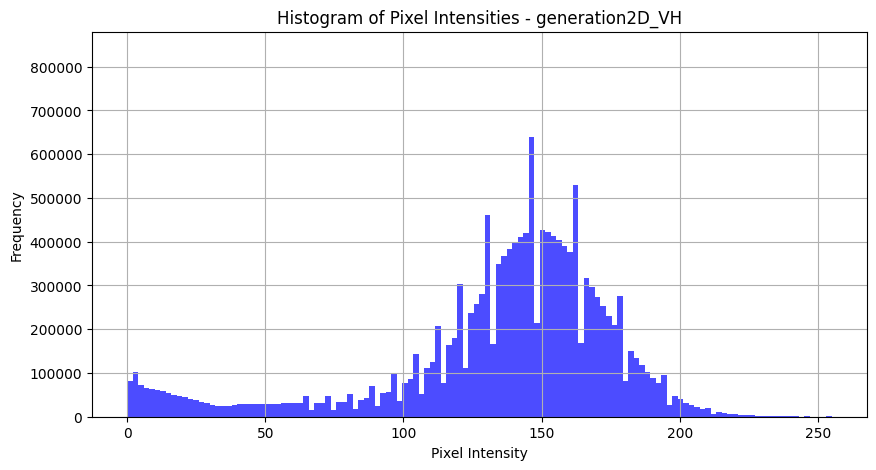

Reading images from folder: /home/benet/data/lesion2D_VH/train/flair
Min pixel value: 0
Max pixel value: 255


<Figure size 640x480 with 0 Axes>

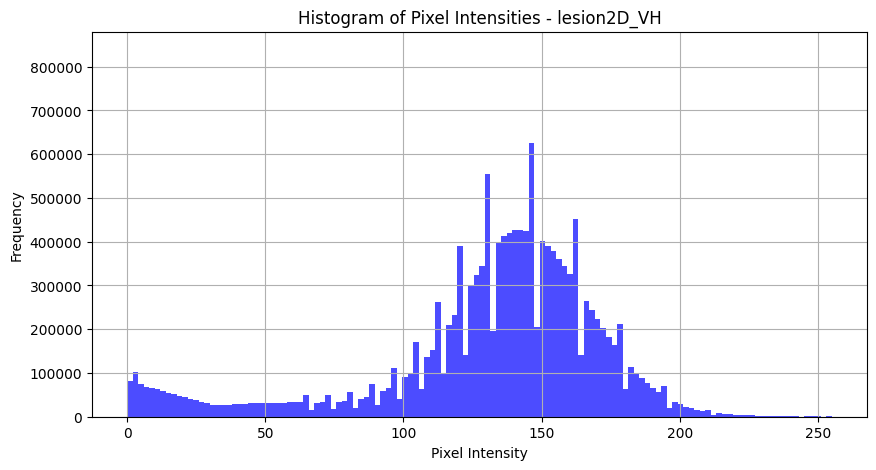

Reading images from folder: /home/benet/data/generation2D_SHIFTS/train/flair
Min pixel value: 0
Max pixel value: 255


<Figure size 640x480 with 0 Axes>

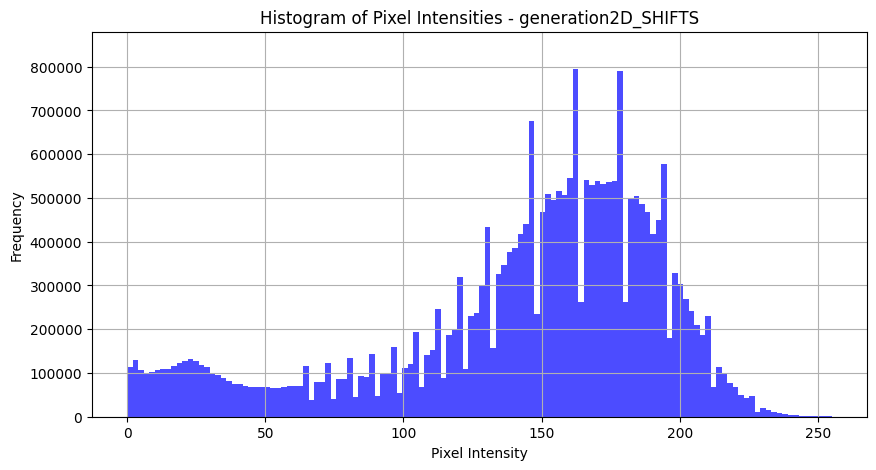

Reading images from folder: /home/benet/data/lesion2D_SHIFTS/train/flair
Min pixel value: 0
Max pixel value: 255


<Figure size 640x480 with 0 Axes>

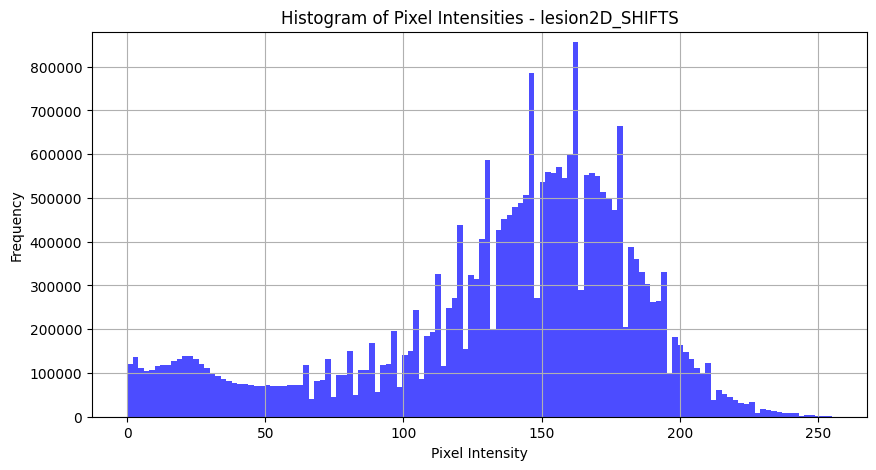

Reading images from folder: /home/benet/data/generation2D_WMH2017/train/flair
Min pixel value: 0
Max pixel value: 255


<Figure size 640x480 with 0 Axes>

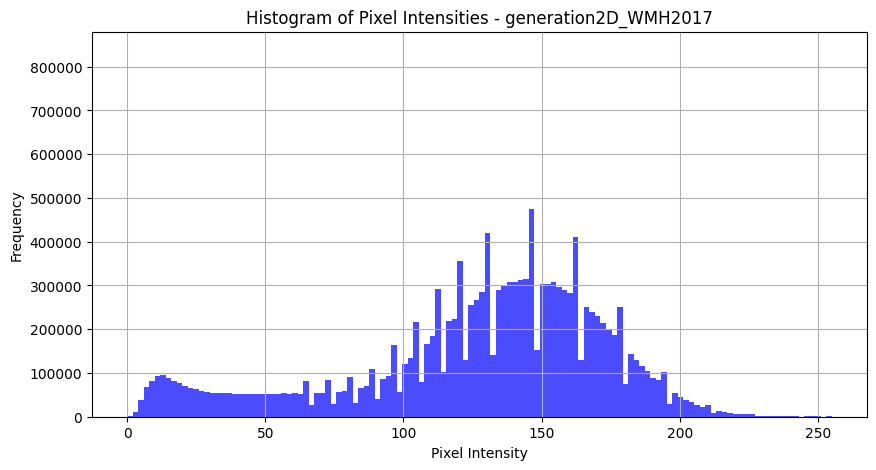

Reading images from folder: /home/benet/data/lesion2D_WMH2017/train/flair
Min pixel value: 0
Max pixel value: 255


<Figure size 640x480 with 0 Axes>

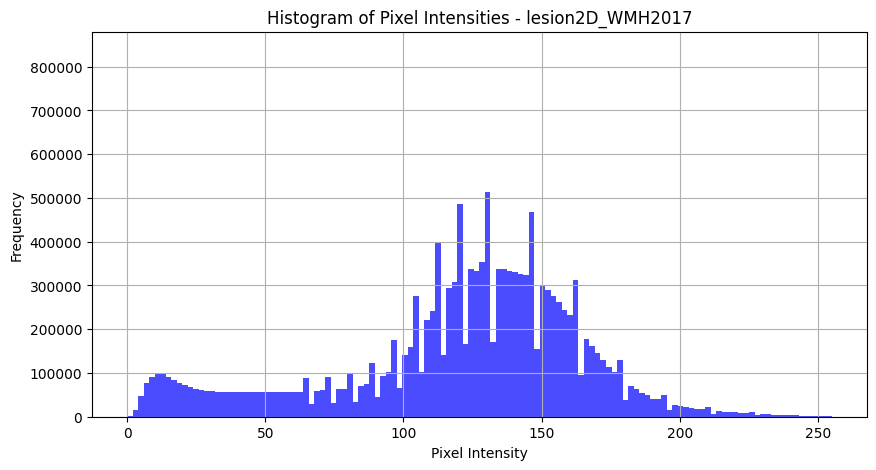

<Figure size 640x480 with 0 Axes>

In [4]:
for folder in folders:
    print(f"Reading images from folder: {folder}")
    # Check if the folder exists
    if not os.path.exists(folder):
        print(f"Folder '{folder}' does not exist.")
        sys.exit(1)

    # Read images from the folder
    images = read_images(folder)

    # Check if any images were found
    if len(images) == 0:
        print(f"No images found in folder '{folder}'.")
        sys.exit(1)

    # Plot histogram of pixel intensities
    plot_histogram(images, dataset_names[folders.index(folder)])